    Pixel      XMAP215    Identity Color
0   -15.0   172.528606  '-XMAP215'     b
1   -15.0     0.000000  '+XMAP215'     m
2   -14.0   114.688895  '-XMAP215'     b
3   -14.0    79.528866  '+XMAP215'     m
4   -13.0    80.799347  '-XMAP215'     b
..    ...          ...         ...   ...
67   18.0  2183.655100  '+XMAP215'     m
68   19.0   -62.554902  '-XMAP215'     b
69   19.0  2073.902100  '+XMAP215'     m
70   20.0   -57.997958  '-XMAP215'     b
71   20.0  1965.015700  '+XMAP215'     m

[72 rows x 4 columns]


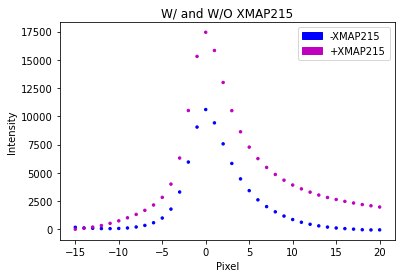

In [1]:
#______________Create modified data set___________________
import csv

x_pixel=[]
y_XMAP215=[]
identity = []
color=[]

with open(r'C:\Users\annao\Desktop\CometData_VF.csv','r') as comets:
    header=comets.readline()
    for line in comets:
        EB=line.rstrip().split(',')
        
        x_pixel.append(float(EB[0]))
        x_pixel.append(float(EB[0]))
        y_XMAP215.append(float(EB[1]))
        y_XMAP215.append (float(EB[2]))
        identity.append ("'-XMAP215'")
        identity.append ("'+XMAP215'")
        color.append("b")
        color.append("m")

with open (r'C:\Users\annao\Desktop\CometData_VF_new.csv','w',newline='') as new_comets:
    writer=csv.writer(new_comets)
    writer.writerow(["Pixel","XMAP215","Identity","Color"])
    for i in range(len(x_pixel)):
        writer.writerow([x_pixel[i],y_XMAP215[i],identity[i],color[i]])
        
#_______________See new data sheet______________________________
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

final_data_pd=pd.read_csv(r'C:\Users\annao\Desktop\CometData_VF_new.csv')
print(final_data_pd)
#_______________Graph modified data set______________________________________________________________
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch


yfull = [(y_XMAP215)]
xfull = [x_pixel]
c= [color]
label =[identity]


plt.scatter(xfull,yfull,s=6,c=color)
neg = patch.Circle((.5,.5),color='b', label="-XMAP215")
pos = patch.Circle((.5,.5),color='m', label="+XMAP215")
plt.legend(handles=[neg,pos])
plt.title("W/ and W/O XMAP215")
plt.xlabel("Pixel")
plt.ylabel("Intensity")
plt.show()
       

In [3]:
#__________Curve fit for -XMAP215 (values above 1)________
import csv
import numpy as np
import scipy as sp
import pylab as pl
from scipy.optimize import curve_fit
from math import inf
import matplotlib.pyplot as plt

xxx_pixel=[]
yyy_XMAP215=[]

with open(r'C:\Users\annao\Desktop\CometData_VF_edit_pos.csv','r') as ccomets:
    header=ccomets.readline()
    for line in ccomets:
        EBB=line.rstrip().split(',')
        
        xxx_pixel.append(float(EBB[0]))
        yyy_XMAP215.append(float(EBB[1]))
        
y3 = yyy_XMAP215
x3 = xxx_pixel

def model_func (x3, A, L):
    return A * np.exp(-x3/L)

paramsneg, extra= curve_fit(model_func, x3, y3, bounds=(1, inf))

mod_y=[]

for i in x3:
    mod_y.append(model_func(i, paramsneg[0], paramsneg[1]))
    
A_, L_ = paramsneg

In [4]:
#__________Curve fit for +XMAP215 (values above 1)________
pex_pixel=[]
pey_XMAP215=[]

with open(r'C:\Users\annao\Desktop\CometData_VF_pos_edit.csv','r') as pecomets:
    header=pecomets.readline()
    for line in pecomets:
        peEBB=line.rstrip().split(',')
        
        pex_pixel.append(float(peEBB[0]))
        pey_XMAP215.append(float(peEBB[1]))
        
import numpy as np
import scipy as sp
import pylab as pl
from scipy.optimize import curve_fit
from math import inf
import matplotlib.pyplot as plt

pey = pey_XMAP215
pex = pex_pixel

def model_func (pex, A, L):
    return A * np.exp(-pex/L)

paramspos, extra= curve_fit(model_func, pex, pey, bounds=(1, inf))

mod_pey=[]

for i in pex:
    mod_pey.append(model_func(i, paramspos[0], paramspos[1]))

A_p, L_p = paramspos

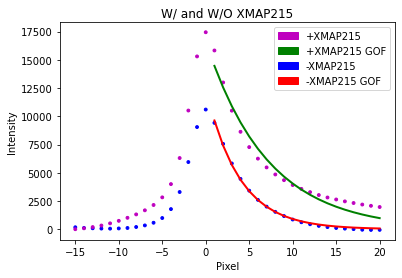

+XMAP215: y = 16662.81 * exp(-x/7.06)
-XMAP215: y = 12520.83 * exp(-x/3.81)


In [5]:
#________Scatter plot graph with curve fits_________________
import numpy as np
import scipy as sp
import pylab as pl
from scipy.optimize import curve_fit
from math import inf
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import csv

plt.scatter(xfull,yfull,s=8,c=color)
neg = patch.Circle((.5,.5),color='b', label="-XMAP215")
pos = patch.Circle((.5,.5),color='m', label="+XMAP215")
posline = patch.Circle((.5,.5),color='g', label="+XMAP215 GOF")
negline = patch.Circle((.5,.5),color='r', label="-XMAP215 GOF")
plt.legend(handles=[pos,posline,neg,negline])
plt.title("W/ and W/O XMAP215")
plt.xlabel("Pixel")
plt.ylabel("Intensity")

plt.plot(pex, mod_pey,'g-', linewidth=2)
plt.plot(x3, mod_y,'r-', linewidth=2)
plt.show()

print(f"+XMAP215: y = {str(round(A_p,2))} * exp(-x/{str(round(L_p,2))})")
print(f"-XMAP215: y = {str(round(A_,2))} * exp(-x/{str(round(L_,2))})")